In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../DATA/annonces_france.csv")
df.head()

,prix,surface,pieces,adresse,type_bien,departement_nom,departement_code
0,135 000,42,2.0,Valserhone (01200),Appartement,Ain,01
1,71 000,100,2.0,Virieu-le-Grand (01510),Maison,Ain,01
2,320 000,270,15.0,Sud Ouest Belley (01300),Maison,Ain,01
3,815 000,327,7.0,Sulignat (01400),Maison,Ain,01
4,509 000,81,4.0,RDC Cessy (01170),Appartement,Ain,01


In [5]:
df.shape

(5904, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prix              5904 non-null   object 
 1   surface           5904 non-null   object 
 2   pieces            5888 non-null   float64
 3   adresse           5751 non-null   object 
 4   type_bien         5904 non-null   object 
 5   departement_nom   5904 non-null   object 
 6   departement_code  5904 non-null   object 
dtypes: float64(1), object(6)
memory usage: 323.0+ KB


In [7]:
df.isna().sum()

prix                  0
surface               0
pieces               16
adresse             153
type_bien             0
departement_nom       0
departement_code      0
dtype: int64

Probleme noté :
->Renommé colonne adresse en ville, mettre une colonne code postal 
->Prix, Surface doit etre mis en int et float
->Valeur nul sur colonne piece, adresse, departement_code

In [9]:
df[df.isna().any(axis=1)]

,prix,surface,pieces,adresse,type_bien,departement_nom,departement_code
46,445 000,"75,5",4.0,NaN,Appartement,Ain,01
636,313 200,120,NaN,Fitou (11510),Maison,Aude,11
698,689 000,138,5.0,NaN,Appartement,Bouches-du-Rhône,13
699,117 000,20,1.0,NaN,Appartement,Bouches-du-Rhône,13
701,138 000,28,2.0,NaN,Appartement,Bouches-du-Rhône,13
...,...,...,...,...,...,...,...
5286,590 000,"59,1",3.0,NaN,Appartement,Hauts-de-Seine,92
5333,365 000,27,1.0,NaN,Appartement,Hauts-de-Seine,92
5423,590 000,"70,6",2.0,NaN,Appartement,Seine-Saint-Denis,93
5436,1 450 000,98,4.0,NaN,Appartement,Val-de-Marne,94


In [11]:
df["Ville"] = df["adresse"].str.replace(r"\s*\(\d+\)", "", regex=True).str.strip()
df["Code_postal"] = df["adresse"].str.extract(r"\((\d+)\)")
df["Code_postal"] = df["Code_postal"].astype("string")
df.head()




,prix,surface,pieces,adresse,type_bien,departement_nom,departement_code,Ville,Code_postal
0,135 000,42,2.0,Valserhone (01200),Appartement,Ain,01,Valserhone,01200
1,71 000,100,2.0,Virieu-le-Grand (01510),Maison,Ain,01,Virieu-le-Grand,01510
2,320 000,270,15.0,Sud Ouest Belley (01300),Maison,Ain,01,Sud Ouest Belley,01300
3,815 000,327,7.0,Sulignat (01400),Maison,Ain,01,Sulignat,01400
4,509 000,81,4.0,RDC Cessy (01170),Appartement,Ain,01,RDC Cessy,01170


In [12]:
df["prix"] = df["prix"].str.replace(r"\s+", "", regex=True)
df["prix_num"] = pd.to_numeric(df["prix"], errors="coerce")

In [13]:
df["surface"]= df["surface"].str.replace(",", ".")
df["surface_num"]= pd.to_numeric(df["surface"], errors="coerce")

In [14]:
df["prix_m2"]=df["prix_num"]/df["surface_num"]

In [15]:
df.head()

,prix,surface,pieces,adresse,type_bien,departement_nom,departement_code,Ville,Code_postal,prix_num,surface_num,prix_m2
0,135000,42,2.0,Valserhone (01200),Appartement,Ain,01,Valserhone,01200,135000,42.0,3214.285714
1,71000,100,2.0,Virieu-le-Grand (01510),Maison,Ain,01,Virieu-le-Grand,01510,71000,100.0,710.000000
2,320000,270,15.0,Sud Ouest Belley (01300),Maison,Ain,01,Sud Ouest Belley,01300,320000,270.0,1185.185185
3,815000,327,7.0,Sulignat (01400),Maison,Ain,01,Sulignat,01400,815000,327.0,2492.354740
4,509000,81,4.0,RDC Cessy (01170),Appartement,Ain,01,RDC Cessy,01170,509000,81.0,6283.950617


In [16]:
df["prix_m2"].describe()

count     5895.000000
mean      3624.336436
std       2394.279885
min         42.857143
25%       1842.919986
50%       3320.987654
75%       4888.888889
max      42380.952381
Name: prix_m2, dtype: float64

In [34]:
df[df["prix_m2"] > 15000]

,prix,surface,pieces,adresse,type_bien,departement_nom,departement_code,Ville,Code_postal,prix_num,surface_num,prix_m2
1391,1790900,46,2.0,Saint Claude - Torcols Besançon (25000),Appartement,Doubs,25,Saint Claude - Torcols Besançon,25000,1790900,46.0,38932.608696
2088,540000,35,3.0,Meribel (73550),Appartement,Isère,38,Meribel,73550,540000,35.0,15428.571429
2946,1780000,42,2.0,Lac Saint-Berthevin (53940),Appartement,Mayenne,53,Lac Saint-Berthevin,53940,1780000,42.0,42380.952381
3509,1880000,101,4.0,Zone Industrielle-Forêt Le Touquet-Paris-Plage...,Appartement,Pas-de-Calais,62,Zone Industrielle-Forêt Le Touquet-Paris-Plage,62520,1880000,101.0,18613.861386
4329,4098250,161,5.0,NaN,Appartement,Paris,75,NaN,<NA>,4098250,161.0,25454.968944
4334,194990,11,1.0,NaN,Appartement,Paris,75,NaN,<NA>,194990,11.0,17726.363636
4348,424000,25,1.0,NaN,Appartement,Paris,75,NaN,<NA>,424000,25.0,16960.000000
4371,1750000,114,5.0,NaN,Appartement,Paris,75,NaN,<NA>,1750000,114.0,15350.877193
4378,953900,63,3.0,NaN,Appartement,Paris,75,NaN,<NA>,953900,63.0,15141.269841
4834,950000,44,2.0,RDC Zone Ouest Urbaine Saint-Tropez (83990),Appartement,Var,83,RDC Zone Ouest Urbaine Saint-Tropez,83990,950000,44.0,21590.909091


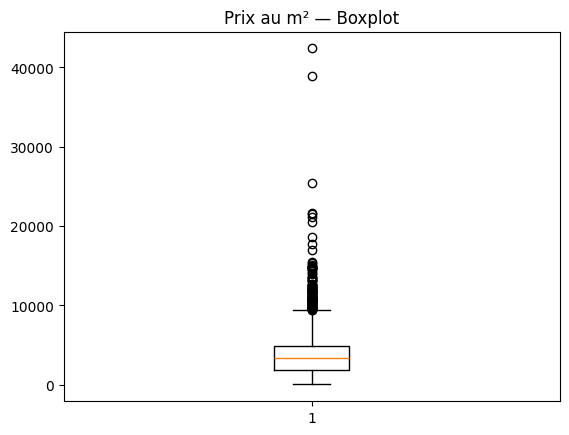

In [18]:
plt.boxplot(df["prix_m2"].dropna())
plt.title("Prix au m² — Boxplot")
plt.show()

In [21]:
df_vf = df[df["prix_m2"] <= 30000].copy()

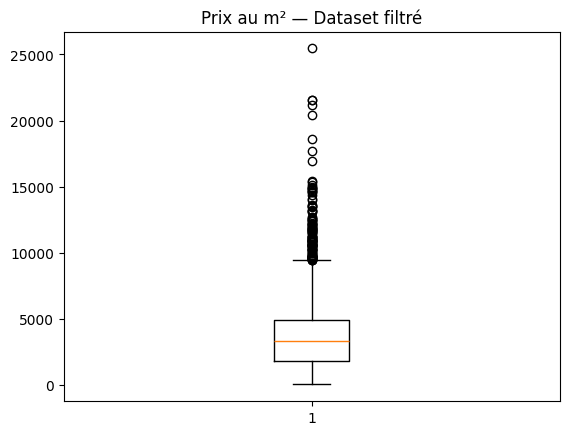

In [22]:
plt.boxplot(df_vf["prix_m2"].dropna())
plt.title("Prix au m² — Dataset filtré")
plt.show()

In [33]:
df_vf[df_vf["prix_m2"] > 15000]["Code_postal"]

2088    73550
3509    62520
4329     <NA>
4334     <NA>
4348     <NA>
4371     <NA>
4378     <NA>
4834    83990
4837    83990
4839    83990
4867    83990
Name: Code_postal, dtype: string

In [26]:
df_vf[df_vf["prix_m2"] > 10000][["surface_num", "prix_num", "Code_postal"]]

,surface_num,prix_num,Code_postal
290,113.0,1240000,73590
357,113.0,1300000,06270
372,105.0,1230000,06160
384,45.0,592500,06360
789,62.0,631000,14800
...,...,...,...
5470,82.0,994000,94160
5485,29.1,325500,<NA>
5733,23.0,262000,97434
5790,98.0,990000,20137


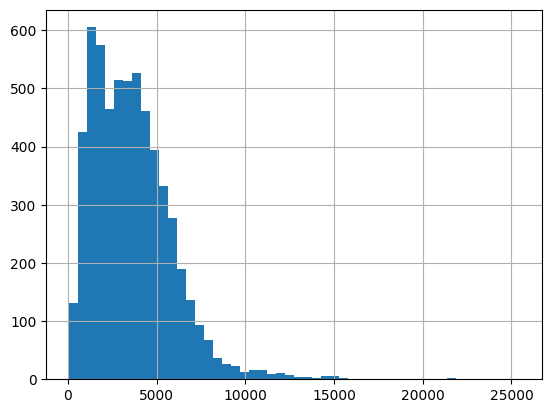

In [27]:
df_vf["prix_m2"].hist(bins=50)
plt.show()

In [28]:
df_vf[df_vf["surface_num"] < 10]

,prix,surface,pieces,adresse,type_bien,departement_nom,departement_code,Ville,Code_postal,prix_num,surface_num,prix_m2
334,85000,9,1.0,La Source Cannes (06400),Appartement,Alpes-Maritimes,06,La Source Cannes,06400,85000,9.0,9444.444444


In [30]:
df_vf[df_vf["surface_num"] <= 15]["prix_m2"].describe()

count        8.000000
mean      6821.856962
std       5157.751899
min       2400.000000
25%       3303.571429
50%       4633.928571
75%       9252.539683
max      17726.363636
Name: prix_m2, dtype: float64

In [208]:
df_vf[df_vf.isna().any(axis=1)]

,type_bien,prix,surface,pieces,adresse,departement_nom,departement_code,Ville,Code_postal,prix_num,surface_num,prix_m2
778,Appartement,211000,200,NaN,"Saint Geraud, Aurillac (15000)",Cantal,15.0,"Saint Geraud, Aurillac",15000,211000,200.0,1055.000000
794,Appartement,211000,200,NaN,"Saint Geraud, Aurillac (15000)",Cantal,15.0,"Saint Geraud, Aurillac",15000,211000,200.0,1055.000000
811,Appartement,211000,200,NaN,"Saint Geraud, Aurillac (15000)",Cantal,15.0,"Saint Geraud, Aurillac",15000,211000,200.0,1055.000000
1779,Maison,595000,260,NaN,NaN,Gers,32.0,NaN,<NA>,595000,260.0,2288.461538
3154,Maison,33500,975,NaN,Appartement à vendre à Stenay (55700) – 3 cha...,Meuse,55.0,"Appartement à vendre à Stenay – 3 chambres, t...",55700,33500,975.0,34.358974
...,...,...,...,...,...,...,...,...,...,...,...,...
6109,Appartement,208000,40,2.0,Calvi (20260),Haute Corse,NaN,Calvi,20260,208000,40.0,5200.000000
6110,Appartement,464000,40,2.0,Calvi (20260),Haute Corse,NaN,Calvi,20260,464000,40.0,11600.000000
6112,Appartement,389000,67,2.0,Propriano (20110),Haute Corse,NaN,Propriano,20110,389000,67.0,5805.970149
6113,Appartement,520000,65,3.0,Calvi (20260),Haute Corse,NaN,Calvi,20260,520000,65.0,8000.000000


In [209]:
df_vf.duplicated().sum()

np.int64(3270)

In [35]:
df_vf[df_vf["prix_m2"] > 15000]

,prix,surface,pieces,adresse,type_bien,departement_nom,departement_code,Ville,Code_postal,prix_num,surface_num,prix_m2
2088,540000,35,3.0,Meribel (73550),Appartement,Isère,38,Meribel,73550,540000,35.0,15428.571429
3509,1880000,101,4.0,Zone Industrielle-Forêt Le Touquet-Paris-Plage...,Appartement,Pas-de-Calais,62,Zone Industrielle-Forêt Le Touquet-Paris-Plage,62520,1880000,101.0,18613.861386
4329,4098250,161,5.0,NaN,Appartement,Paris,75,NaN,<NA>,4098250,161.0,25454.968944
4334,194990,11,1.0,NaN,Appartement,Paris,75,NaN,<NA>,194990,11.0,17726.363636
4348,424000,25,1.0,NaN,Appartement,Paris,75,NaN,<NA>,424000,25.0,16960.000000
4371,1750000,114,5.0,NaN,Appartement,Paris,75,NaN,<NA>,1750000,114.0,15350.877193
4378,953900,63,3.0,NaN,Appartement,Paris,75,NaN,<NA>,953900,63.0,15141.269841
4834,950000,44,2.0,RDC Zone Ouest Urbaine Saint-Tropez (83990),Appartement,Var,83,RDC Zone Ouest Urbaine Saint-Tropez,83990,950000,44.0,21590.909091
4837,1350000,66,3.0,Zone Ouest Urbaine Saint-Tropez (83990),Appartement,Var,83,Zone Ouest Urbaine Saint-Tropez,83990,1350000,66.0,20454.545455
4839,1548000,73,3.0,Zone Ouest Urbaine Saint-Tropez (83990),Appartement,Var,83,Zone Ouest Urbaine Saint-Tropez,83990,1548000,73.0,21205.479452


In [36]:
df_vf[df_vf["adresse"].isna()]

,prix,surface,pieces,adresse,type_bien,departement_nom,departement_code,Ville,Code_postal,prix_num,surface_num,prix_m2
46,445000,75.5,4.0,NaN,Appartement,Ain,01,NaN,<NA>,445000,75.5,5894.039735
698,689000,138,5.0,NaN,Appartement,Bouches-du-Rhône,13,NaN,<NA>,689000,138.0,4992.753623
699,117000,20,1.0,NaN,Appartement,Bouches-du-Rhône,13,NaN,<NA>,117000,20.0,5850.000000
701,138000,28,2.0,NaN,Appartement,Bouches-du-Rhône,13,NaN,<NA>,138000,28.0,4928.571429
702,330000,59,2.0,NaN,Appartement,Bouches-du-Rhône,13,NaN,<NA>,330000,59.0,5593.220339
...,...,...,...,...,...,...,...,...,...,...,...,...
5286,590000,59.1,3.0,NaN,Appartement,Hauts-de-Seine,92,NaN,<NA>,590000,59.1,9983.079526
5333,365000,27,1.0,NaN,Appartement,Hauts-de-Seine,92,NaN,<NA>,365000,27.0,13518.518519
5423,590000,70.6,2.0,NaN,Appartement,Seine-Saint-Denis,93,NaN,<NA>,590000,70.6,8356.940510
5436,1450000,98,4.0,NaN,Appartement,Val-de-Marne,94,NaN,<NA>,1450000,98.0,14795.918367


In [40]:
df_vf["Ville"] = df_vf["Ville"].fillna(df_vf["departement_nom"])

In [39]:
dep_str = df_vf["departement_code"].astype("string")
dep_for_cp = dep_str.replace({"2A": "20", "2B": "20"})
df_vf["Code_postal"] = df_vf["Code_postal"].fillna(
    dep_for_cp.str.zfill(2) + "000"
)

In [41]:
df_vf[df_vf["adresse"].isna()]

,prix,surface,pieces,adresse,type_bien,departement_nom,departement_code,Ville,Code_postal,prix_num,surface_num,prix_m2
46,445000,75.5,4.0,NaN,Appartement,Ain,01,Ain,01000,445000,75.5,5894.039735
698,689000,138,5.0,NaN,Appartement,Bouches-du-Rhône,13,Bouches-du-Rhône,13000,689000,138.0,4992.753623
699,117000,20,1.0,NaN,Appartement,Bouches-du-Rhône,13,Bouches-du-Rhône,13000,117000,20.0,5850.000000
701,138000,28,2.0,NaN,Appartement,Bouches-du-Rhône,13,Bouches-du-Rhône,13000,138000,28.0,4928.571429
702,330000,59,2.0,NaN,Appartement,Bouches-du-Rhône,13,Bouches-du-Rhône,13000,330000,59.0,5593.220339
...,...,...,...,...,...,...,...,...,...,...,...,...
5286,590000,59.1,3.0,NaN,Appartement,Hauts-de-Seine,92,Hauts-de-Seine,92000,590000,59.1,9983.079526
5333,365000,27,1.0,NaN,Appartement,Hauts-de-Seine,92,Hauts-de-Seine,92000,365000,27.0,13518.518519
5423,590000,70.6,2.0,NaN,Appartement,Seine-Saint-Denis,93,Seine-Saint-Denis,93000,590000,70.6,8356.940510
5436,1450000,98,4.0,NaN,Appartement,Val-de-Marne,94,Val-de-Marne,94000,1450000,98.0,14795.918367


In [42]:
df_vf["Ville_clean"] = df_vf["adresse"].str.extract(r"^(.*)\s*\(")

In [43]:
mots_a_enlever = [
    "RDC", "Zone", "Quartier", "Secteur", "Ouest", "Est",
    "Nord", "Sud", "Urbaine", "Industrielle", "Forêt",
    "Proche", "Centre", "Ville", "Centre-ville"
]


In [44]:
for mot in mots_a_enlever:
    df_vf["Ville_clean"] = df_vf["Ville_clean"].str.replace(rf"\b{mot}\b", "", regex=True)


In [45]:
df_vf["Ville_clean"] = df_vf["Ville_clean"].str.replace(r"\s+", " ", regex=True).str.strip()

In [46]:
df_vf.loc[df_vf["adresse"].str.contains("RDC|Zone|Urbaine|Ouest", na=False),
          ["adresse", "Ville_clean"]].head(20)

,adresse,Ville_clean
2,Sud Ouest Belley (01300),Belley
4,RDC Cessy (01170),Cessy
5,RDC Nord Jassans-Riottier (01480),Jassans-Riottier
14,Nord Ouest Divonne-les-Bains (01220),Divonne-les-Bains
15,RDC Centre Ferney-Voltaire (01210),Ferney-Voltaire
51,Ouest Trévoux (01600),Trévoux
77,RDC Saint Waast Soissons (02200),Saint Waast Soissons
84,Ouest Vaires-sur-Marne (77360),Vaires-sur-Marne
94,RDC Saint Waast Soissons (02200),Saint Waast Soissons
134,RDC Deniere les Romains Vichy (03200),Deniere les Romains Vichy
